<h3>Introduction</h3>

In [25]:
import pandas as pd
import numpy as np

# Örnek veri setini oluşturalım
np.random.seed(42)
X = np.random.rand(100) * 10  # Bağımsız değişken
Y = 2 * X + 1 + np.random.randn(100) * 2  # Bağımlı değişken (gerçek bir ilişki + gürültü)

# Veri setini bir DataFrame'e dönüştürelim
data = pd.DataFrame({'X': X, 'Y': Y})

# Veri setini CSV dosyasına yazalım
data.to_csv('data1.csv', index=False)

# Verinin ilk 5 ini yazdıralım
print(data.head())


          X          Y
0  3.745401   8.664897
1  9.507143  19.416271
2  7.319939  15.823400
3  5.986585   8.998032
4  1.560186   3.681029


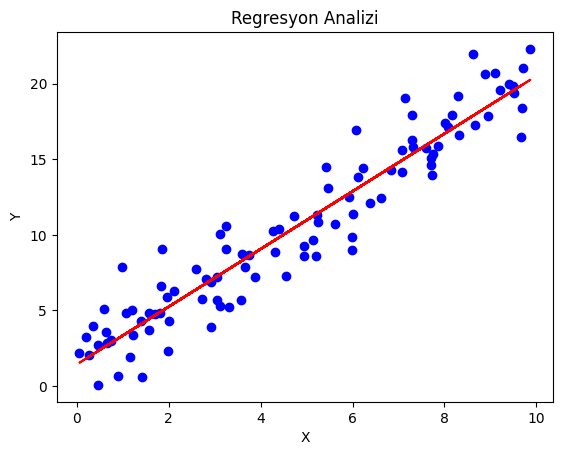

Regresyon Katsayısı (Eğim): 1.908045354575393
Kesim noktası: 1.4301923150935014


In [26]:
# Python ile regresyon analizi için kullanılan kütüphaneleri içeri aktaralım
# import pandas as pd
# import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Örnek veri setini oluşturalım
data = pd.read_csv("data1.csv")

# Bağımsız değişken X ve bağımlı değişken Y'yi seçelim
X = data['X'].values.reshape(-1, 1)
Y = data['Y'].values

# Regresyon modelini oluşturalım ve eğitelim
model = LinearRegression()
model.fit(X, Y)

# Regresyon eğrisini çizelim
plt.scatter(X, Y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresyon Analizi')
plt.show()

# Modelin eğimini ve kesim noktasını yazdıralım
print(f"Regresyon Katsayısı (Eğim): {model.coef_[0]}")
print(f"Kesim noktası: {model.intercept_}")


In [27]:
# Veri setini kullanarak korelasyon analizini gerçekleştirelim
korelasyon_katsayisi = data['X'].corr(data['Y'])
print(f"Korelasyon Katsayısı: {korelasyon_katsayisi}")


Korelasyon Katsayısı: 0.9529657473628447


<h3>Least Square</h3>


In [28]:
from scipy.optimize import minimize
# Fonksiyonu minimize etmek için hedef fonksiyonumuzu tanımlayalım
def objective(params, X, Y):
    beta0, beta1 = params
    predictions = beta0 + beta1 * X
    squared_errors = (Y - predictions) ** 2
    return np.sum(squared_errors)

# Başlangıç değerlerini belirleyelim
initial_guess = [0, 0]

# minimize fonksiyonunu kullanarak en küçük kareler çözümünü bulalım
result = minimize(objective, initial_guess, args=(X, Y), method='BFGS')

# Optimize edilmiş parametre değerlerini alalım
beta0_optimized, beta1_optimized = result.x

# Optimize edilmiş parametre değerlerini ekrana yazdıralım
print(f"Optimize edilmiş Beta0: {beta0_optimized}")
print(f"Optimize edilmiş Beta1: {beta1_optimized}")

Optimize edilmiş Beta0: 10.401454181005546
Optimize edilmiş Beta1: 2.193441617998855e-09


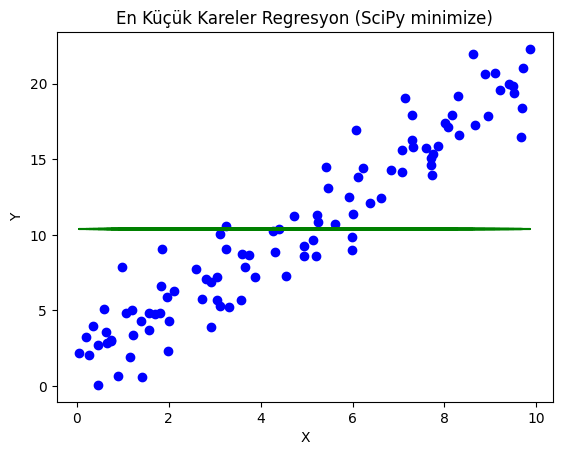

In [29]:
# Optimize edilmiş regresyon eğrisini çizelim
plt.scatter(X, Y, color='blue')
plt.plot(X, beta0_optimized + beta1_optimized * X, color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('En Küçük Kareler Regresyon (SciPy minimize)')
plt.show()

<h3>SST = SSR + SSE</h3>

<h3>R^2 Coeffiecent of Determination</h3>

In [30]:
# SST, SSR ve SSE değerlerini hesaplayalım
mean_Y = np.mean(Y)
SST = np.sum((Y - mean_Y) ** 2)
SSR = np.sum((model.predict(X) - mean_Y) ** 2)
SSE = np.sum((Y - model.predict(X)) ** 2)

# R-kare (Coefficient of Determination) değerini hesaplayalım
r2 = SSR / SST

# Sonuçları ekrana yazdıralım
print(f"SST (Toplam Kareler Toplamı): {SST}")
print(f"SSR (Regresyon Kareler Toplamı): {SSR}")
print(f"SSE (Hata Kareler Toplamı): {SSE}")
print(f"R^2 (Coefficient of Determination): {r2}")

SST (Toplam Kareler Toplamı): 3512.3761848055756
SSR (Regresyon Kareler Toplamı): 3189.742359218753
SSE (Hata Kareler Toplamı): 322.6338255868214
R^2 (Coefficient of Determination): 0.9081437156468245


Bunların çizimi:

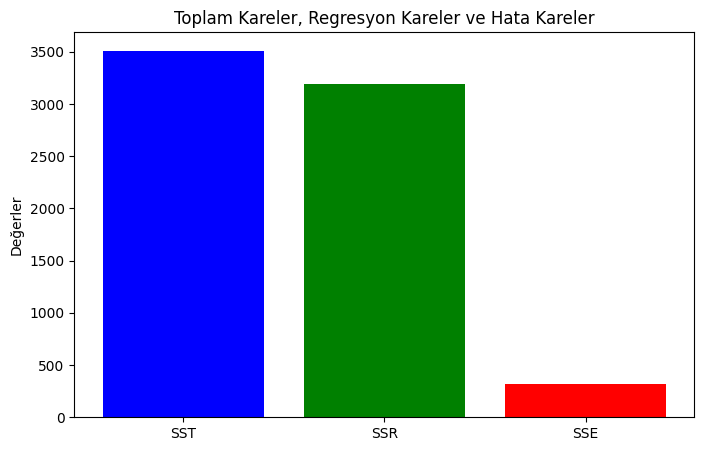

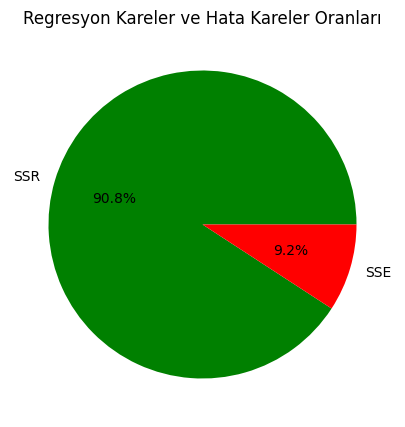

In [31]:
# Bar grafiği için değerleri hazırlayalım
labels = ['SST', 'SSR', 'SSE']
values = [SST, SSR, SSE]

# Bar grafiğini çizelim
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'green', 'red'])
plt.title('Toplam Kareler, Regresyon Kareler ve Hata Kareler')
plt.ylabel('Değerler')
plt.show()

# Pasta grafiği için değerleri hazırlayalım
labels_pie = ['SSR', 'SSE']
values_pie = [SSR, SSE]

# Pasta grafiğini çizelim
plt.figure(figsize=(8, 5))
plt.pie(values_pie, labels=labels_pie, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Regresyon Kareler ve Hata Kareler Oranları')
plt.show()

  Group     Value
0     C  7.582123
1     A  0.887748
2     C  7.894332
3     C  7.754998
4     A -0.207166
ANOVA F-Statistic: 403.63027994420173
ANOVA P-Value: 9.510208522958385e-48


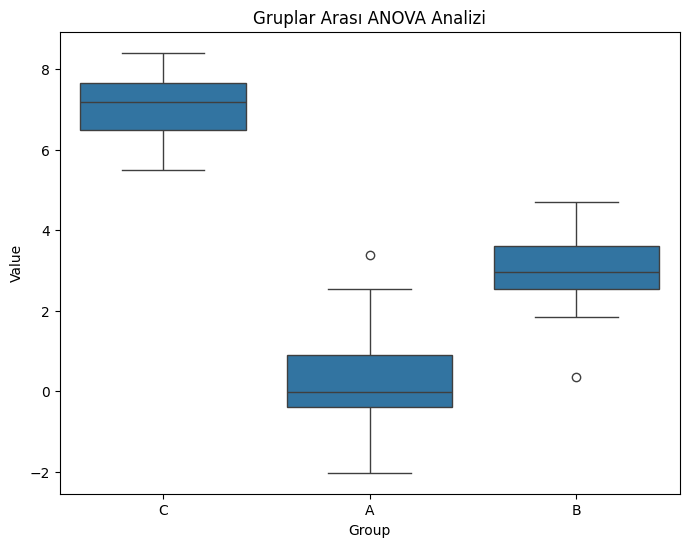

In [32]:
from scipy.stats import f_oneway
import seaborn as sns

# Örnek veri setini oluşturalım
np.random.seed(42)
X = np.random.choice(['A', 'B', 'C'], size=100)  # Kategorik bağımsız değişken
group_means = {'A': 0, 'B': 3, 'C': 7}
Y = np.random.randn(100) + np.array([group_means[group] for group in X])  # Gruplara göre farklı ortalamalar + gürültü

# Veri setini bir DataFrame'e dönüştürelim
d_anova = pd.DataFrame({'Group': X, 'Value': Y})

# Veriyi ekrana yazdıralım
print(d_anova.head())

# ANOVA analizini yapalım
f_statistic, p_value = f_oneway(d_anova[d_anova['Group'] == 'A']['Value'],
                                d_anova[d_anova['Group'] == 'B']['Value'],
                                d_anova[d_anova['Group'] == 'C']['Value'])

# Sonuçları ekrana yazdıralım
print(f'ANOVA F-Statistic: {f_statistic}')
print(f'ANOVA P-Value: {p_value}')

# Gruplar arası kutu grafiği çizelim
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Value', data=d_anova)
plt.title('Gruplar Arası ANOVA Analizi')
plt.show()



<h3>Lets look vif</h3>